In [2]:
from skimage.io import imread
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

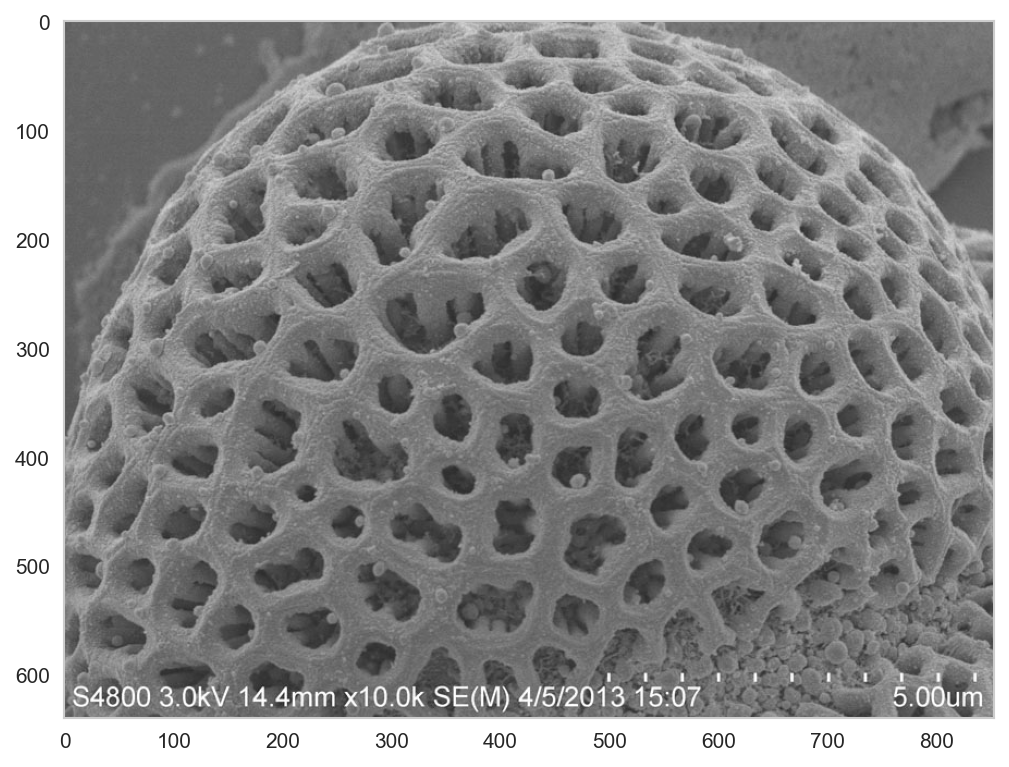

In [5]:
imgg=imread('.../archive/3dsem/Pollen1001.jpg')
#fig, m_axs = plt.subplots(1, 1, figsize=(5, 5))
fig = plt.plot(figsize=(3, 3))
plt.imshow(imgg)

In [6]:
imgg=imread('/Users/yweilin/Desktop/study/code/archive/3dsem/Pollen1001.jpg', as_gray=True)
imgg2=imread('/Users/yweilin/Desktop/study/code/archive/3dsem/Pollen1002.jpg', as_gray=True)

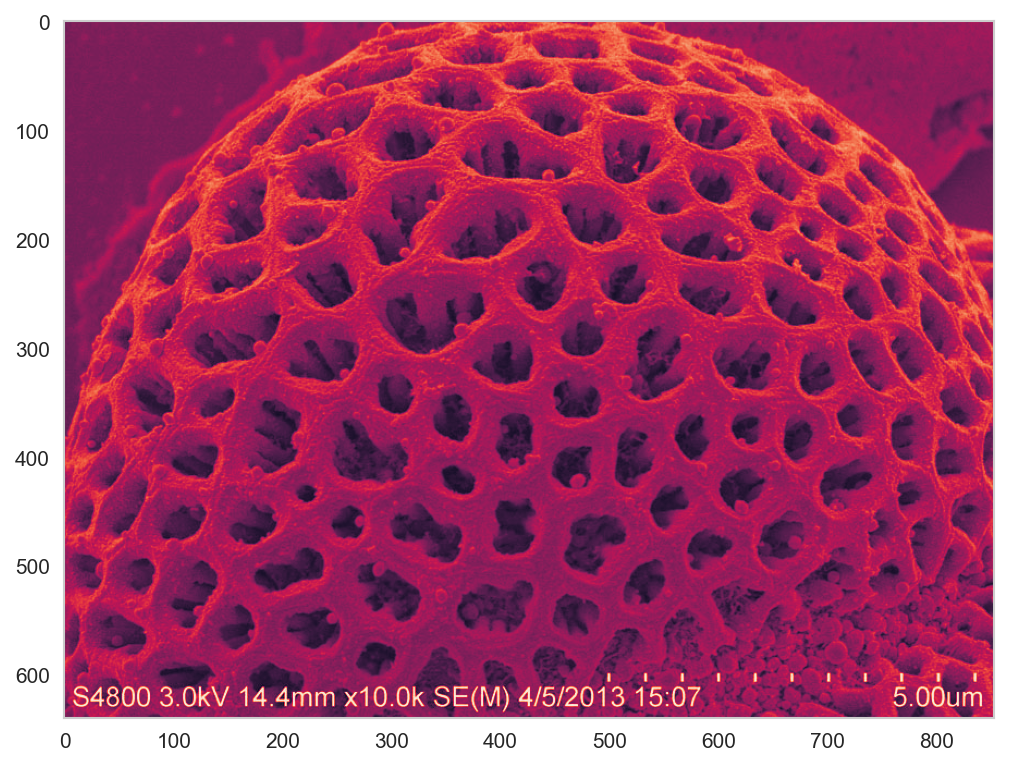

In [7]:
imgg=imread('/Users/yweilin/Desktop/study/code/archive/3dsem/Pollen1001.jpg', as_gray=True)
imgg2=imread('/Users/yweilin/Desktop/study/code/archive/3dsem/Pollen1002.jpg', as_gray=True)
fig = plt.plot(figsize=(3, 3))
plt.imshow(imgg)

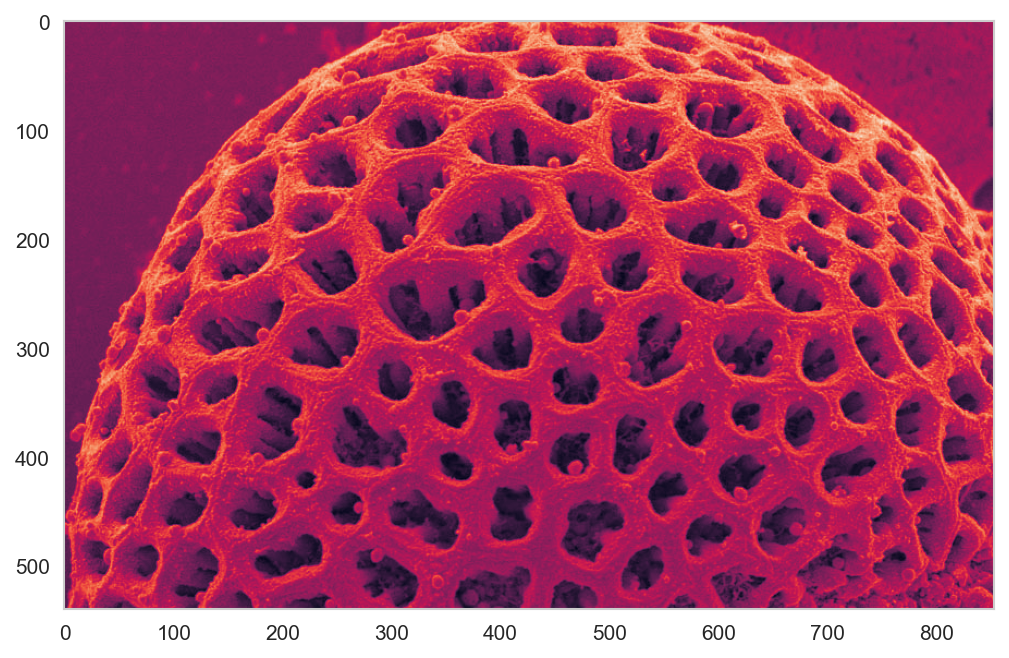

In [25]:
fig = plt.plot(figsize=(3, 3))
plt.imshow(imgg2[:-100])

In [9]:
from skimage.feature import corner_harris, corner_peaks, ORB
descriptor_extractor = ORB(n_keypoints=1000)

def extract_points(in_img):
    descriptor_extractor.detect_and_extract(in_img)
    return {'keypoints': descriptor_extractor.keypoints,
            'descriptors': descriptor_extractor.descriptors}

In [10]:
extracted_image=extract_points(imgg[:-100])
extracted_image2=extract_points(imgg2[:-100])

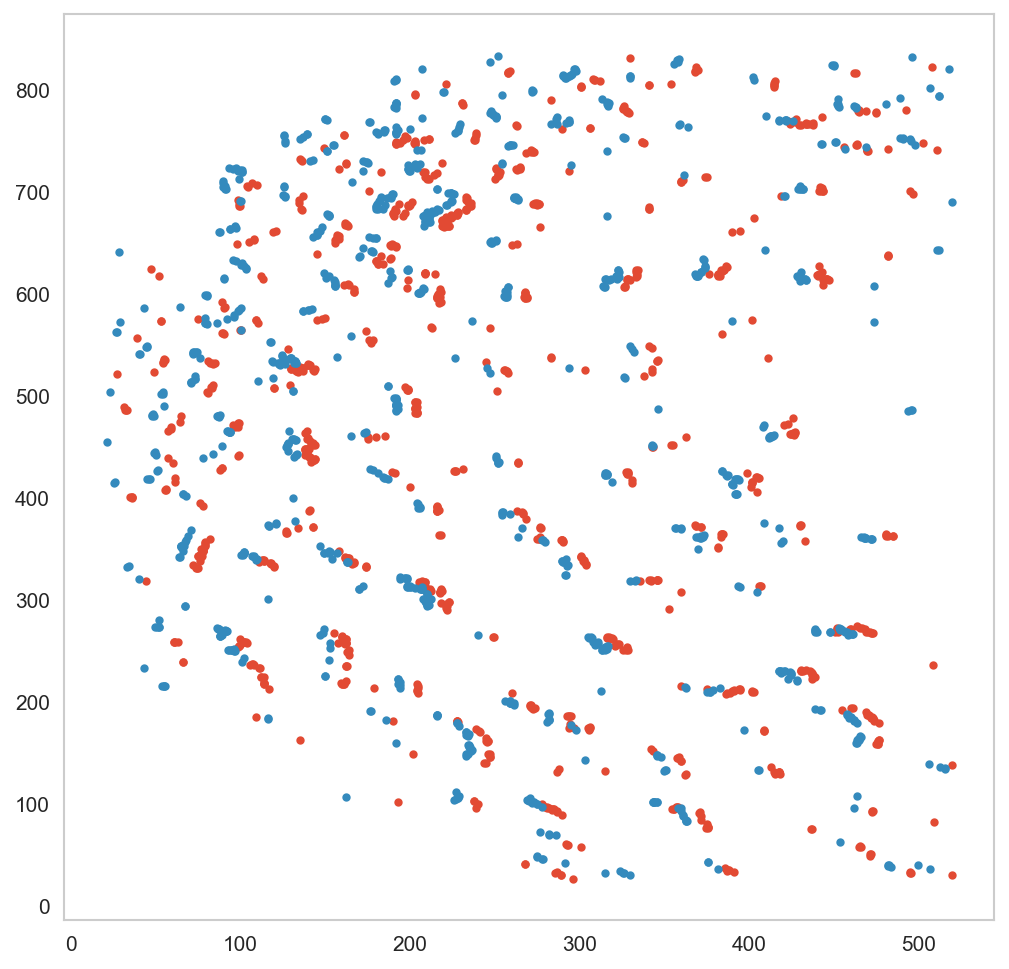

In [26]:
fig = plt.plot(figsize=(3, 3))
plt.plot(extracted_image['keypoints'][:, 0],
             extracted_image['keypoints'][:, 1],
             '.',)
plt.plot(extracted_image2['keypoints'][:, 0],
             extracted_image2['keypoints'][:, 1],
             '.',)

In [14]:
from skimage.feature import match_descriptors, plot_matches
c_matches = match_descriptors(extracted_image['descriptors'],extracted_image2['descriptors'], cross_check=True)

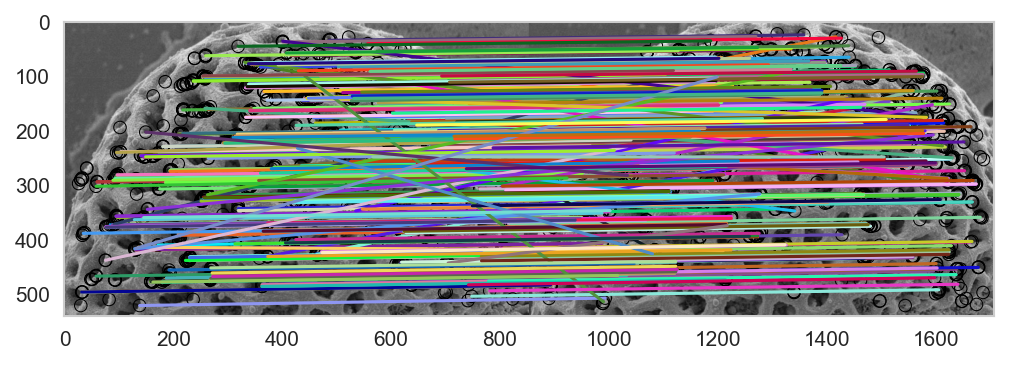

In [17]:
fig = plt.plot(figsize=(3, 3))
plot_matches(plt,
                 imgg[:-100], imgg2[:-100],
                 extracted_image['keypoints'], extracted_image2['keypoints'],
                 c_matches)

array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

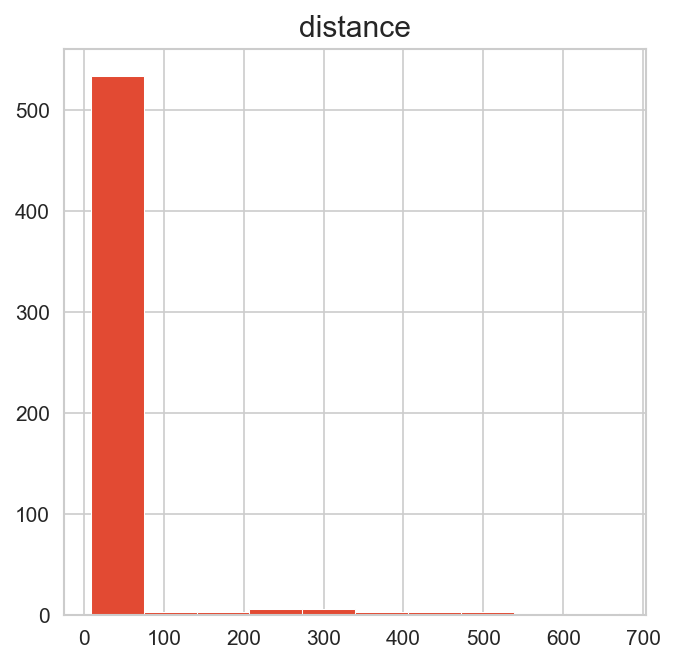

In [21]:
dist_list=[]
for i, (c_idx, n_idx) in enumerate(c_matches):
    x_vec = [extracted_image['keypoints'][c_idx, 0], extracted_image2['keypoints'][n_idx, 0]]
    y_vec = [extracted_image['keypoints'][c_idx, 1], extracted_image2['keypoints'][n_idx, 1]]
    dist = np.sqrt(np.square(np.diff(x_vec))+np.square(np.diff(y_vec)))[0]
    dist_list.append(dist)
dist_list_df=pd.DataFrame(dist_list,columns=['distance'])
dist_list_df.hist(figsize=(5, 5))

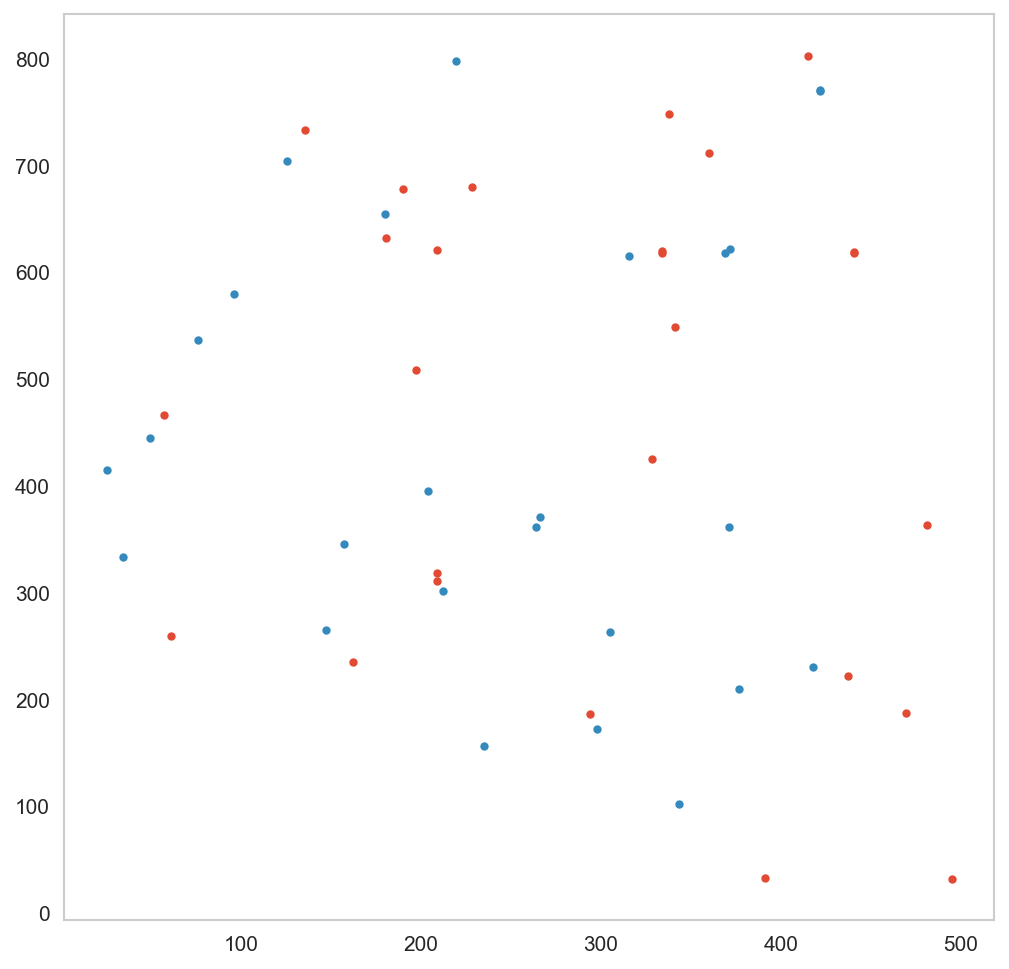

In [23]:
outlier=[]
outlier_index=[]
for x in dist_list:
    if x > 100:
        outlier.append(x)
        outlier_index.append(dist_list.index(x))
fig = plt.plot(figsize=(3, 3))
plt.plot(extracted_image['keypoints'][:, 0][outlier_index],
             extracted_image['keypoints'][:, 1][outlier_index],
             '.',)
plt.plot(extracted_image2['keypoints'][:, 0][outlier_index],
             extracted_image2['keypoints'][:, 1][outlier_index],
             '.',)